Cria sistema de recomendação

In [3]:
# importa bibliotecas
import pandas as pd

In [4]:
# lê dataset
df_movies = pd.read_csv('./data/movies.csv')
df_rating = pd.read_csv('./data/ratings.csv')

In [8]:
# Verifica dataset
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# Verifica dataset
#unixtimestamp: conta a quantidades de segundos entre a data 01/01/1970 e o momento em que foi gerado o dado
df_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
# imprime filme de id = 50
# só print(df_movies['movieId']==50) imprime boleano, onde id==50 é True, demais False
print(df_movies[df_movies['movieId']==50])

    movieId                       title                  genres
46       50  Usual Suspects, The (1995)  Crime|Mystery|Thriller


In [16]:
#juntando os datasets
df_movie_rating = pd.merge(df_movies, df_rating, on='movieId')
df_movie_rating

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [18]:
#importa bibliotecas para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#nota média atribuída para cada filme
#agrupa o dataframe pela coluna title
#encontra a média das notas de cada filme e ordena a lista dos valores
df_movie_rating.groupby('title')['rating'].mean().sort_values(ascending=False).head()


title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [25]:
#conta a quantidade de notas que cada filme recebeu
#agrupa o dataframe movie_rating pela coluna title
#soma a quantidade de notas que cada filme recebeu e ordena a lista
df_movie_rating.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [39]:
#cria novo dataframe contendo o nome de cada filme e a media das notas recebidas 
df_avg_ratings = pd.DataFrame(df_movie_rating.groupby('title')['rating'].mean())
df_avg_ratings.sort_values(by='rating',ascending=False).head()

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0


In [42]:
#adiciona coluna com quantidade de notas que cada um dos filmes recebeu
df_avg_ratings['count'] = df_movie_rating.groupby('title')['rating'].count()
df_avg_ratings.sort_values(by='count',ascending=False).head()

,rating,count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [43]:
df_avg_ratings.sort_values(by='rating',ascending=False).head()

,rating,count
title,,
Gena the Crocodile (1969),5.0,1
True Stories (1986),5.0,1
Cosmic Scrat-tastrophe (2015),5.0,1
Love and Pigeons (1985),5.0,1
Red Sorghum (Hong gao liang) (1987),5.0,1


<AxesSubplot:>

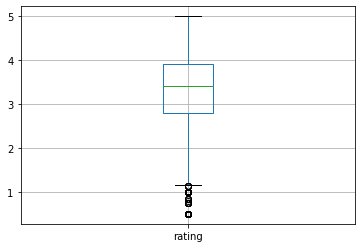

In [45]:
# Plota boxplot para visualizar anomalias
df_avg_ratings.boxplot(column='rating')

<AxesSubplot:>

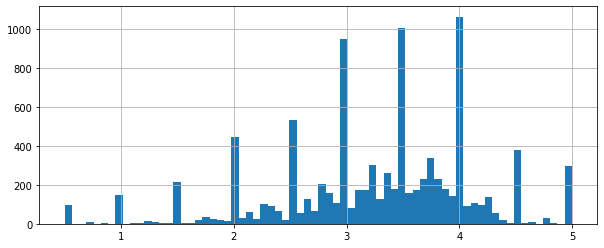

In [49]:
# Plota histograma para média das notas
plt.figure(figsize=(10,4))
df_avg_ratings['rating'].hist(bins=70)
